In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df_init = pd.read_csv("master.csv")
df_HDI = pd.read_csv("Human development index (HDI).csv", encoding ='latin1')

In [4]:
df_init.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df_init.shape

(27820, 12)

In [6]:
df_HDI.shape

(189, 29)

In [7]:
df_HDI.head(10)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.777,0.770,0.766,0.762,0.765,0.768,0.770,0.775,0.778,0.780
6,Argentina,0.704,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,...,0.795,0.799,0.813,0.819,0.818,0.820,0.820,0.822,0.822,0.825
7,Armenia,0.631,0.628,0.580,0.588,0.599,0.605,0.612,0.623,0.636,...,0.727,0.724,0.728,0.731,0.737,0.742,0.745,0.748,0.749,0.755
8,Australia,0.866,0.867,0.868,0.872,0.875,0.883,0.886,0.889,0.892,...,0.920,0.921,0.923,0.925,0.929,0.931,0.933,0.936,0.938,0.939
9,Austria,0.795,0.800,0.805,0.807,0.813,0.817,0.820,0.824,0.835,...,0.884,0.886,0.895,0.897,0.899,0.897,0.901,0.903,0.906,0.908


In [8]:
df_HDI.Country = df_HDI.Country.str.lstrip()

In [9]:
df_HDI = pd.melt(df_HDI, id_vars=["Country"], var_name=['Year'],value_name="HDI")
df_HDI = df_HDI.sort_values(["Country", "Year"])
df_HDI.reset_index(drop=True)

,Country,Year,HDI
0,Afghanistan,1990,NaN
1,Afghanistan,1991,NaN
2,Afghanistan,1992,NaN
3,Afghanistan,1993,NaN
4,Afghanistan,1994,NaN
5,Afghanistan,1995,NaN
6,Afghanistan,1996,NaN
7,Afghanistan,1997,NaN
8,Afghanistan,1998,NaN
9,Afghanistan,1999,NaN


In [10]:
for index, row in df_HDI.iterrows():
    df_init.loc[(df_init['country'] == row['Country']) & (df_init['year'] == int(row['Year'])), 'HDI for year'] = row['HDI']

In [11]:
df_init.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year          5194
 gdp_for_year ($)        0
gdp_per_capita ($)       0
generation               0
dtype: int64

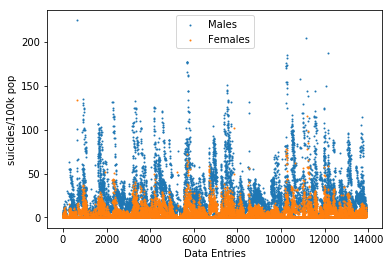

       year  suicides/100k pop
0      1987               6.71
1      1987               5.19
2      1987               4.83
3      1987               4.59
4      1987               3.28
5      1987               2.81
6      1987               2.15
7      1987               1.56
8      1987               0.73
9      1987               0.00
10     1987               0.00
11     1987               0.00
12     1988               5.49
13     1988               5.33
14     1988               4.48
15     1988               4.46
16     1988               2.85
17     1988               2.71
18     1988               2.03
19     1988               1.91
20     1988               1.79
21     1988               1.41
22     1988               0.00
23     1988               0.00
24     1989               8.89
25     1989               6.35
26     1989               4.71
27     1989               4.22
28     1989               3.71
29     1989               2.43
...     ...                ...
27790  2

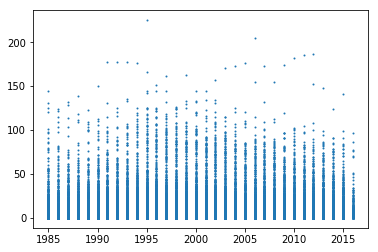

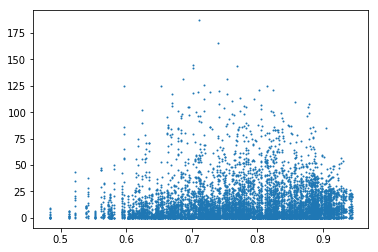

In [ ]:
data = df_init

males = data[data['sex'] == 'male']
females = data[data['sex'] != 'male']

men_mean = pd.DataFrame.mean(males['suicides/100k pop'])
men_median = pd.DataFrame.median(males['suicides/100k pop'])
men_max = pd.DataFrame.max(males['suicides/100k pop'])

plt.scatter(range(len(males['suicides/100k pop'])), males['suicides/100k pop'], s = 1,)
plt.scatter(range(len(males['suicides/100k pop'])), females['suicides/100k pop'], s = 1)
plt.xlabel('Data Entries')
plt.ylabel('suicides/100k pop')
plt.legend(('Males', 'Females'))
plt.show()

years = data[['year', 'suicides/100k pop']]
HDI = data[['year', 'HDI for year', 'suicides/100k pop']]
GDP = data[['year', ' gdp_for_year ($) ', 'suicides/100k pop']]
population = data[['year', 'population', 'suicides/100k pop']]
GDP_capita = data[['year', 'gdp_per_capita ($)', 'suicides/100k pop']]

years.dropna()
HDI.dropna()
GDP.dropna()
population.dropna()
GDP_capita.dropna()
print(years)

years_list = years['year'].tolist()
years_suicide_list = years['suicides/100k pop'].tolist()
plt.scatter(years_list, years_suicide_list, s = 1)
plt.show()

HDI_list = HDI['HDI for year'].tolist()
HDI_suicide_list = HDI['suicides/100k pop'].tolist()
plt.scatter(HDI_list, HDI_suicide_list, s = 1)
plt.show()

GDP_list = GDP[' gdp_for_year ($) '].tolist()
GDP_suicide_list = GDP['suicides/100k pop'].tolist()
plt.scatter(GDP_list, GDP_suicide_list, s = 1)
plt.show()

GDP_capita_list = GDP_capita['gdp_per_capita ($)'].tolist()
GDP_capita_suicide_list = GDP_capita['suicides/100k pop'].tolist()
plt.scatter(GDP_capita_list, GDP_capita_suicide_list, s = 1)
plt.show()

population_list = population['population'].tolist()
population_suicide_list = population['suicides/100k pop'].tolist()
plt.scatter(population_list, population_suicide_list, s = 1)
plt.show()



years_hist = years.hist(bins=29)
plt.show()
print()

#for i in range(29):
#	hist = GDP_capita[GDP_capita['year'] == 1985+i].hist(bins=50)
#	plt.show()
